Обработка и анализ данных задания "Кто Я?"

Бельченко Алиса БВСН231

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Считываем данные

In [8]:
df = pd.read_excel("Kto_ya.xlsx")
df.head()

,Студент,1,2,3,4,5,6
0,Студент_01_01,человек,девушка,студент,"программист психолог, который любит когнитивны...","человек, который любит природу и танцы","сестра, друг"
1,Студент_01_02,человек,девушка,"сестра, друг","студент - программист - психолог, который люби...","человек, который любит природу и танцы",просто чилловый парень
2,Студент_02_01,девушка,студентка,дочь,сестра,подруга,любитель поп-культуры
3,Студент_02_02,человек,девушка,дочь,сестра,подруга,студентка
4,Студент_03_01,Девушка,Друг,Студент,Будущий аналитик данных,Танцор,Хороший партнер


Создаем отдельные колонки для номера пробы и номера студента

In [16]:
df['num'] = df['Студент'].apply(lambda x: x.split('_')[2])
df.head()

,Студент,1,2,3,4,5,6,num
0,Студент_01_01,человек,девушка,студент,"программист психолог, который любит когнитивны...","человек, который любит природу и танцы","сестра, друг",01
1,Студент_01_02,человек,девушка,"сестра, друг","студент - программист - психолог, который люби...","человек, который любит природу и танцы",просто чилловый парень,02
2,Студент_02_01,девушка,студентка,дочь,сестра,подруга,любитель поп-культуры,01
3,Студент_02_02,человек,девушка,дочь,сестра,подруга,студентка,02
4,Студент_03_01,Девушка,Друг,Студент,Будущий аналитик данных,Танцор,Хороший партнер,01


In [17]:
df['student'] = df['Студент'].apply(lambda x: x[:-3])
df.head()

,Студент,1,2,3,4,5,6,num,student
0,Студент_01_01,человек,девушка,студент,"программист психолог, который любит когнитивны...","человек, который любит природу и танцы","сестра, друг",01,Студент_01
1,Студент_01_02,человек,девушка,"сестра, друг","студент - программист - психолог, который люби...","человек, который любит природу и танцы",просто чилловый парень,02,Студент_01
2,Студент_02_01,девушка,студентка,дочь,сестра,подруга,любитель поп-культуры,01,Студент_02
3,Студент_02_02,человек,девушка,дочь,сестра,подруга,студентка,02,Студент_02
4,Студент_03_01,Девушка,Друг,Студент,Будущий аналитик данных,Танцор,Хороший партнер,01,Студент_03


Функция для отображения облака слов

In [ ]:
from wordcloud import WordCloud

def plot_cloud(text):
    wordcloud = WordCloud(font_path='DejaVuSans.ttf',
                      width=1000, 
                      height=600, 
                      background_color='black',
                      margin=20,
                      colormap='Pastel1',
                      collocations=True).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Функция для очистки текста от лишних символов

In [ ]:
import re

def clean_text(text):
    cleaned_text = re.sub(r'[^а-яА-ЯёЁ ]', '', text)
    cleaned_text = cleaned_text.lower()
    cleaned_text = re.sub(r's+', ' ', cleaned_text).strip()
    return cleaned_text


Собираем текст из всех нужных ячеек датафрейма

In [53]:
text = {'01':[], '02': []}
for prob in ['01', '02']:
    data = df[df['num'] == prob]
    for _, row in data.iterrows():
        for ans in range(1, 7):
            text[prob].append(clean_text(row[str(ans)]))

Отрисовываем облако слов для ответов до воздействия

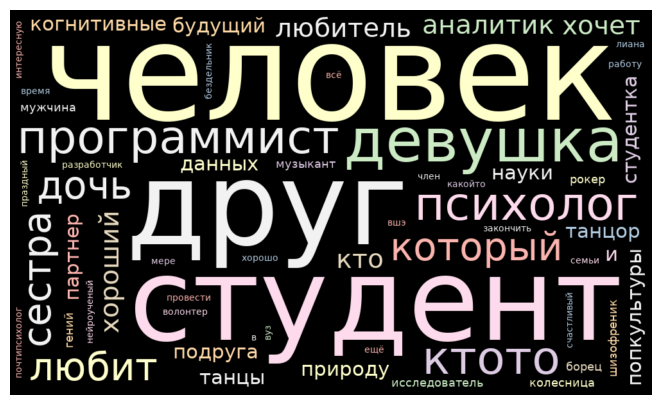

In [65]:
plot_cloud(' '.join(text['01']))

Отрисовываем облако слов для ответов после воздействия

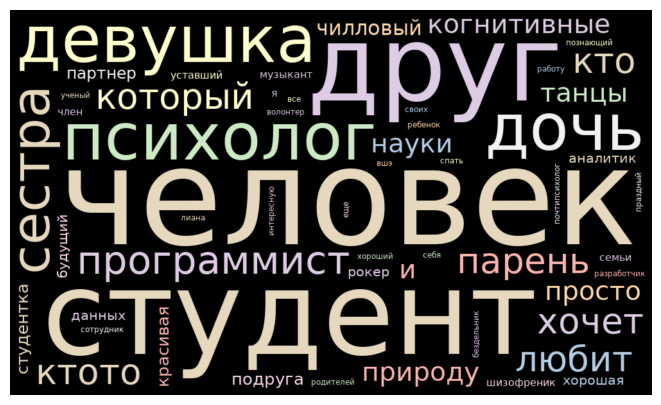

In [66]:
plot_cloud(' '.join(text['02']))